# Проект по анализу перспективных направлений продаж в интернет магазине компьютерных игр на 2017 год

**Цель исследования** — выявить закономерности в данных, определяющие успешность продажи игры. В дальнейшем, результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год

**Ход исследования:**<br>
1. Загрузка данных и необходимых библиотек<br>
2. Подготовка данных<br>
3. Исследовательский анализ данных<br>
4. Портрет пользователя каждого региона<br>
5. Проверка гипотез<br>
6. Общий вывод <br>

**Описание данных**<br>

* Name — название игры<br>
* Platform — платформа<br>
* Year_of_Release — год выпуска<br>
* Genre — жанр игры<br>
* NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
* EU_sales — продажи в Европе (миллионы проданных копий)<br>
* JP_sales — продажи в Японии (миллионы проданных копий)<br>
* Other_sales — продажи в других странах (миллионы проданных копий)<br>
* Critic_Score — оценка критиков (максимум 100)<br>
* User_Score — оценка пользователей (максимум 10)<br>
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>



**Оглавление**
* [Загрузка данных и импорт необходимых библиотек](#1)
* [Подготовка файла](#2)
* [Исследовательский анализ данных](#3)
* [Портрет пользователя](#4)
* [Проверка гипотез](#5)
* [Общий вывод](#6)

<a class="anchor" id="1"></a>
## Загрузка данных и импорт необходимых библиотек

In [258]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [259]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import missingno as msno

In [260]:
all_data=pd.read_csv('/datasets/games.csv')
all_data.info()
all_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<a class="anchor" id="2"></a>
## Подготовка данных

In [261]:
all_data.columns=all_data.columns.str.lower()

In [262]:
all_data.loc[all_data['user_score']=='tbd']=np.nan
all_data.loc[all_data['critic_score']=='tbd']=np.nan
all_data['user_score']=all_data['user_score'].astype('float64')

In [263]:
all_data.isna().sum()

name               2426
platform           2424
year_of_release    2645
genre              2426
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       9660
user_score         9125
rating             9140
dtype: int64

<AxesSubplot:>

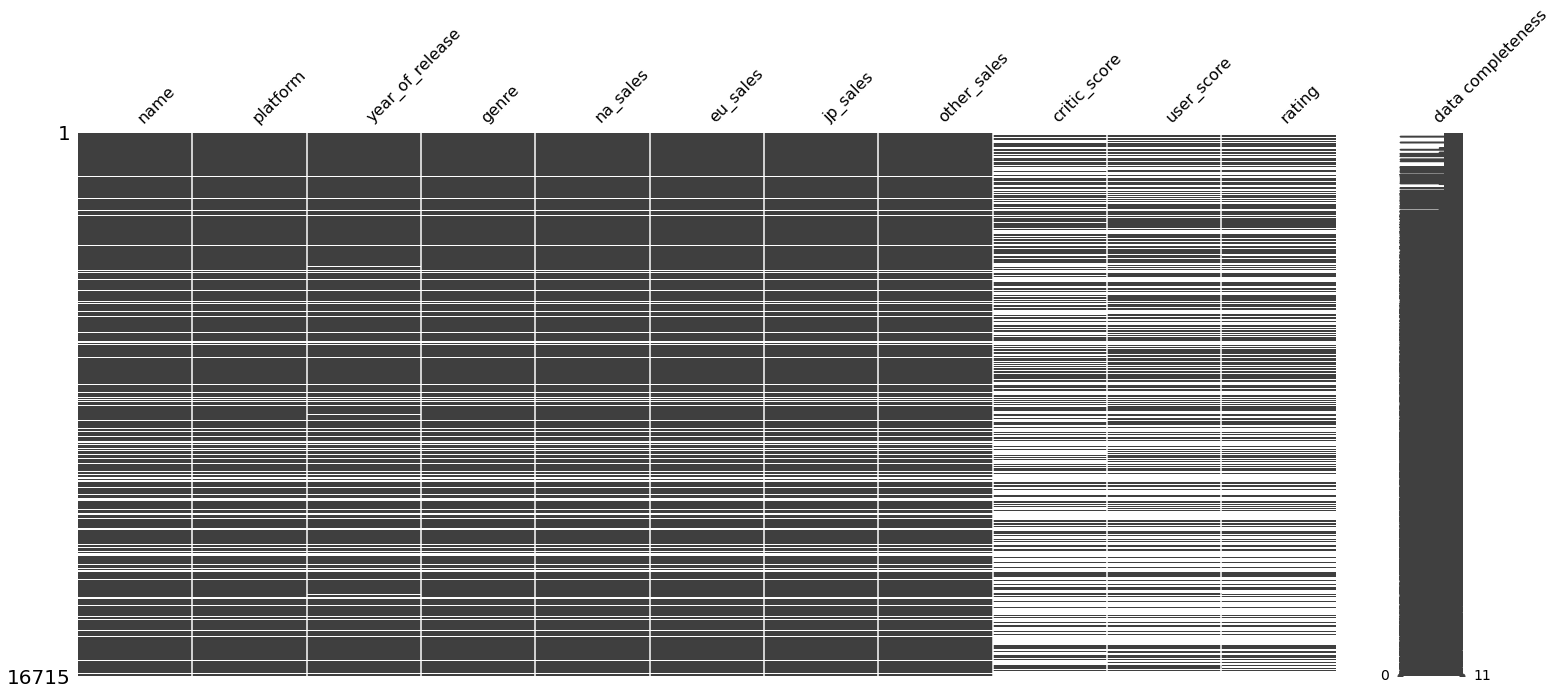

In [264]:
msno.matrix(all_data, labels=True)

In [265]:
all_data=all_data.dropna(how='all')
all_data=all_data.dropna(subset=['name','year_of_release'])
all_data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7141
user_score         6605
rating             6626
dtype: int64

In [266]:
data.duplicated().sum()

0

In [267]:
all_data['total_sales']=all_data['na_sales']+all_data['eu_sales']+all_data['jp_sales']+all_data['other_sales']
all_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<a class="anchor" id="3"></a>
## Исследовательский аналих данных

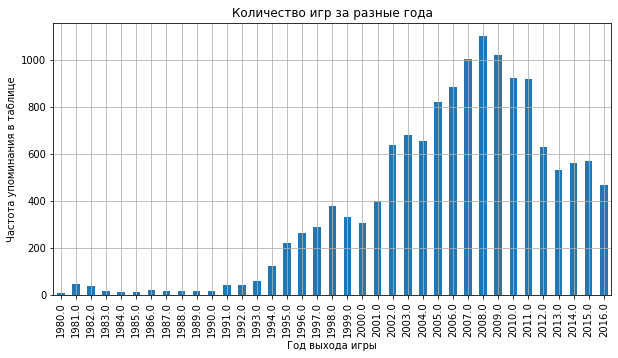

In [268]:
all_data.pivot_table(index='year_of_release',
                     values='name', aggfunc=['count'])\
.plot(grid=True, figsize=(10, 5), kind='bar', title='Количество игр за разные года', legend = None)
plt.xlabel("Год выхода игры")
plt.ylabel("Частота упоминания в таблице")
plt.show()

<div class="alert alert-block alert-info">
на графике вижно, что после 1994 года началась активная разработка игр

к 2008 году он достигает своего максимума
    
на текущий момент времени количество произведенных игр в год заметно ниже, предположу, что это связано с тем, что игры стали сложнее в техническом плане и их создании требует большего времени, так например ААА игры создаются за 3-5 лет в среднем   
</div>

In [269]:
top_platforms=all_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_5=top_platforms.head(5)
top_5

platform
PS2     1171.19
X360     948.74
PS3      921.09
Wii      791.91
PS       714.26
Name: total_sales, dtype: float64

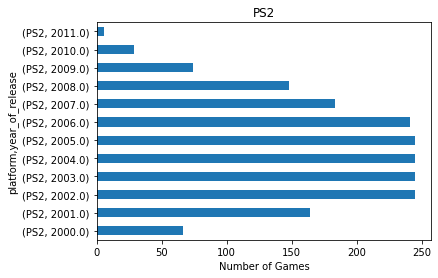

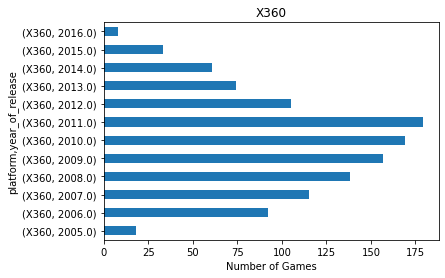

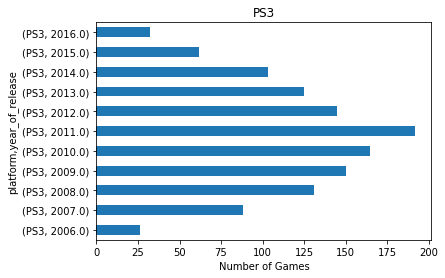

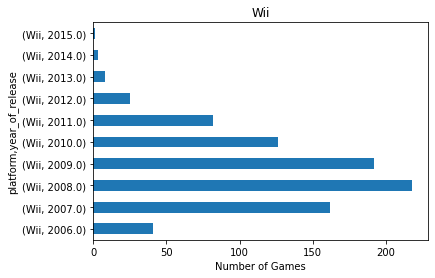

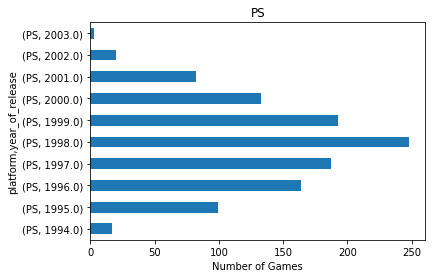

In [270]:
for x in top_5.index:
    ax = (
        all_data.pivot_table(index=['platform', 'year_of_release'], values='genre', aggfunc='count')
        .query('platform == @x')
        .plot(kind='barh', title=x, legend=False)
    )
    ax.set_xlabel('Number of Games')

In [271]:
all_data\
.pivot_table(index=('platform','year_of_release'),values='total_sales', aggfunc='sum').reset_index().query('year_of_release!=0')\
.pivot_table(index='platform', values='year_of_release', aggfunc='count')\
['year_of_release'].describe()

count    31.000000
mean      7.645161
std       5.063256
min       1.000000
25%       4.000000
50%       7.000000
75%      10.500000
max      26.000000
Name: year_of_release, dtype: float64

<div class="alert alert-block alert-info">
в результате вычислений и построения графиков видно, что время жизни популярных игровых консолей составляет примерно 7-8 лет, имея пик популярности через 4-5 лет после выхода, максимальное значение соответсвует PC который имеет свой рынок на протяжении всей истории наблюдений 
</div>

In [272]:
data=all_data.query('year_of_release>=2014')
old_plat=['X360','PS3','PS2','PSP','Wii']
data=data.query('platform !=@old_plat')

<div class="alert alert-block alert-info">
определяю актуальным промежутком последнии 3 года на момент анализа, т.к время жизни консолей довольно мааленикое и можно потерять актульность если брать данные за больший период
    
так же убираю виды консолей которые у производителей являются не последними в своей линейке, так как политика фирм производящих игры и консоли устроена так, что поле выхода нового поколения практически прекращается поддержка предыдущего поколения. Следовательно делать ставки на консоли прошлого поколения не будет иметь смысла
</div>

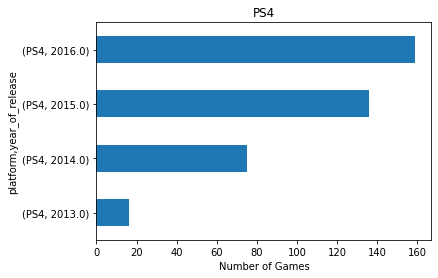

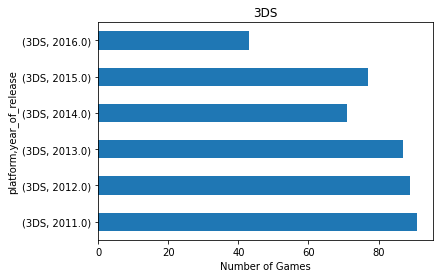

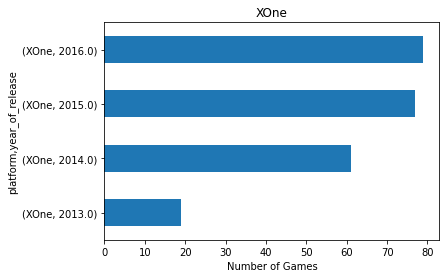

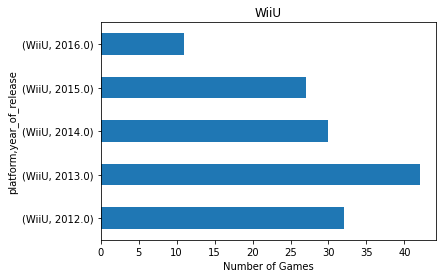

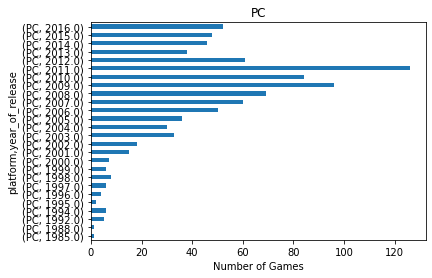

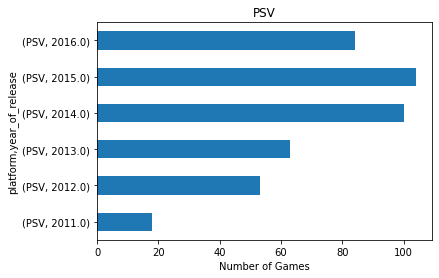

In [273]:
for x in data['platform'].unique():
    ax = (
        all_data.pivot_table(index=['platform', 'year_of_release'], values='genre', aggfunc='count')
        .query('platform == @x')
        .plot(kind='barh', title=x, legend=False)
    )
    ax.set_xlabel('Number of Games')

<div class="alert alert-block alert-info">
в результате отбора актуальных данных и платформ, видно что оставшиеся платформы либо находятся на своей стадии активного роста, либо прошли свой пик, но еще достаточно популярны, что бы включать их в план развития на 2017 год 
</div>

In [274]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV'], dtype=object)

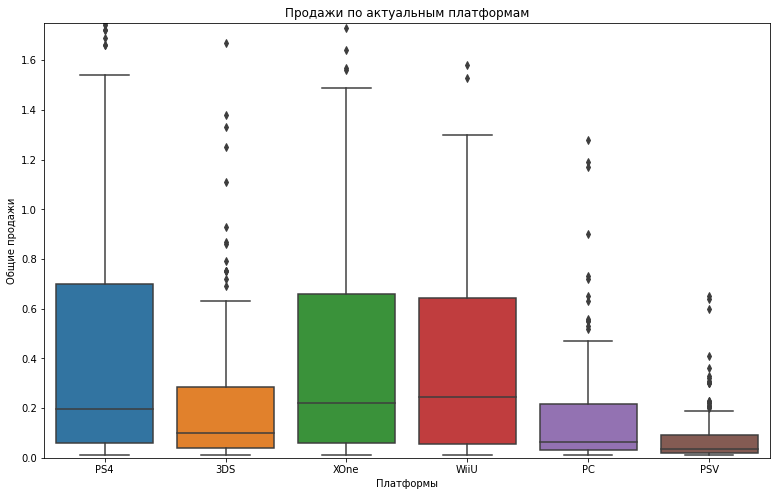

In [275]:

plt.figure(figsize=(13, 8))
(sns.boxplot(data=data,y=data['total_sales'], x='platform')
    .set(title = 'Продажи по актуальным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 1.75)))
plt.show()

<div class="alert alert-block alert-info">
строю график распределения прибыли по каждой из оставшихся консолей,

выделяются 3 главные игровые платформы с наибольшими средними продажами:
    
PS4
    
XOne
    
WiiU
</div>

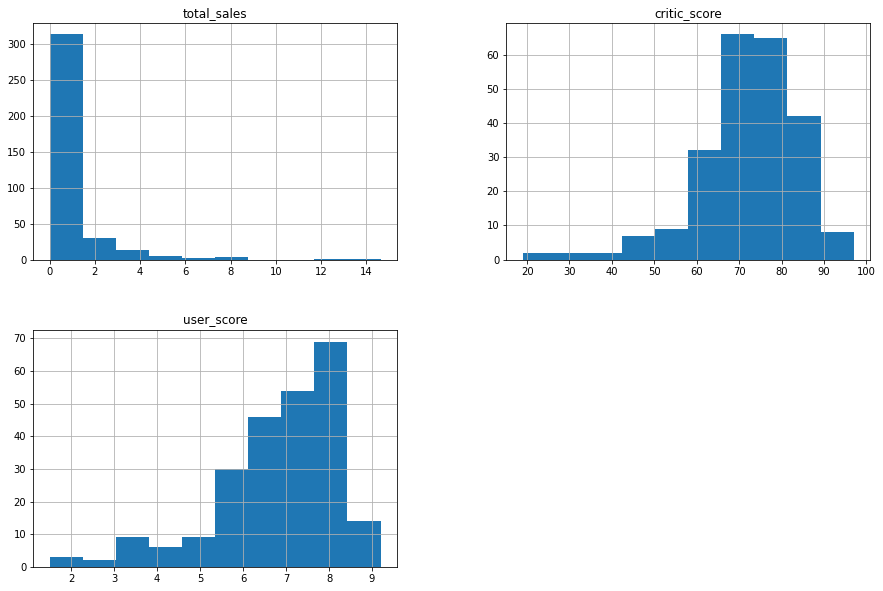

In [276]:
data.loc[data['platform'] == 'PS4',['total_sales', 'critic_score', 'user_score']].hist(figsize=(15,10))
plt.show()

<div class="alert alert-block alert-info">
смотрю распределения оценок пользователей, и критиков
    
выбросов или некорректных значений нет
</div>

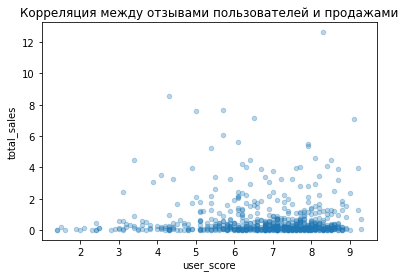

Коэффициент корреляции Пирсона продаж от отзывов пользователей: -0.003


In [277]:
data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
plt.title('Корреляция между отзывами пользователей и продажами')
plt.show()
print('Коэффициент корреляции Пирсона продаж от отзывов пользователей:', round(data['user_score'].corr(data['total_sales']), 3))

<div class="alert alert-block alert-info">
в результате видно, что оценки пользователей никак не влияют на продаваемость игры, связь отстутствует
</div>

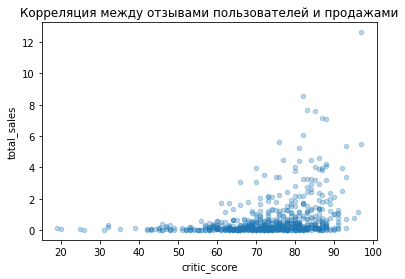

Коэффициент корреляции Пирсона продаж от отзывов критиков: 0.325


In [278]:
data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.title('Корреляция между отзывами пользователей и продажами')
plt.show()
print('Коэффициент корреляции Пирсона продаж от отзывов критиков:', round(data['critic_score'].corr(data['total_sales']), 3))

<div class="alert alert-block alert-info">
не смотря на больший коэффицент корреляции, чем у оценок пользователей, все еще нельзя сказать, что оценки критиков влияют на продаваемость игры
</div>



Проведем анализ зависимости между отзывами и продажами для платформы PS4


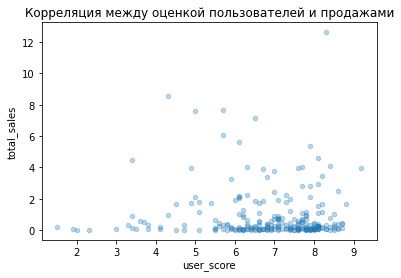

Коэффициент корреляции Пирсона продаж от оценок пользователей: -0.04


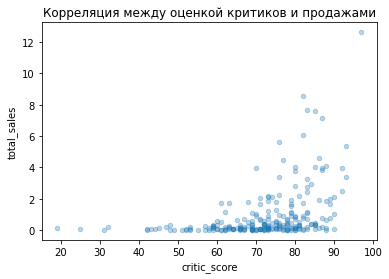

Коэффициент корреляции Пирсона продаж от оценок критиков: 0.402


Проведем анализ зависимости между отзывами и продажами для платформы 3DS


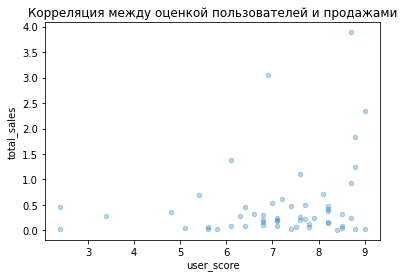

Коэффициент корреляции Пирсона продаж от оценок пользователей: 0.215


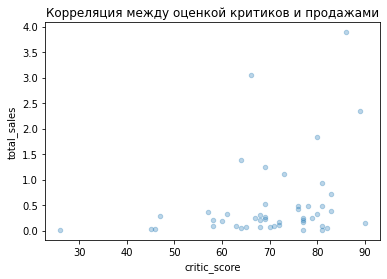

Коэффициент корреляции Пирсона продаж от оценок критиков: 0.285


Проведем анализ зависимости между отзывами и продажами для платформы XOne


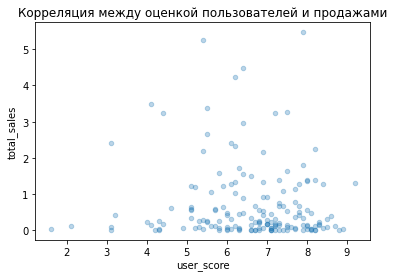

Коэффициент корреляции Пирсона продаж от оценок пользователей: -0.07


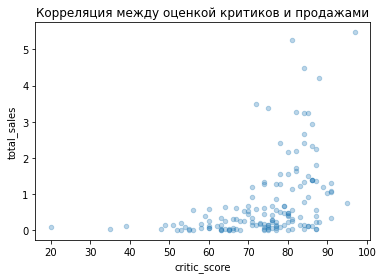

Коэффициент корреляции Пирсона продаж от оценок критиков: 0.424


Проведем анализ зависимости между отзывами и продажами для платформы WiiU


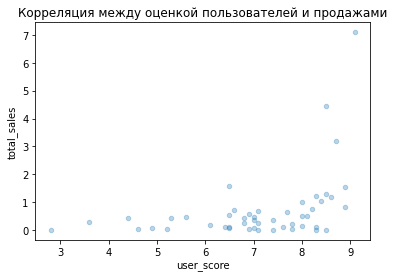

Коэффициент корреляции Пирсона продаж от оценок пользователей: 0.408


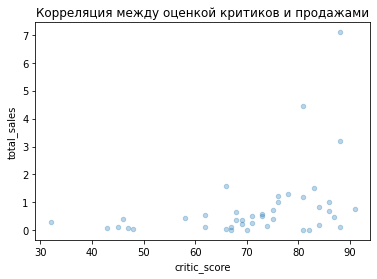

Коэффициент корреляции Пирсона продаж от оценок критиков: 0.376


Проведем анализ зависимости между отзывами и продажами для платформы PC


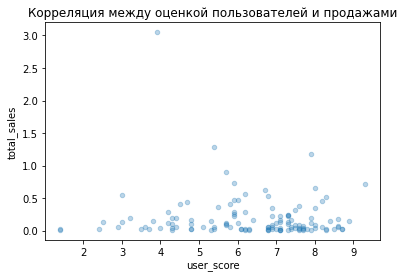

Коэффициент корреляции Пирсона продаж от оценок пользователей: -0.072


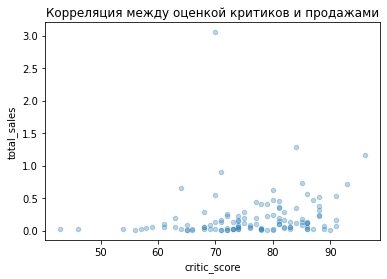

Коэффициент корреляции Пирсона продаж от оценок критиков: 0.175


Проведем анализ зависимости между отзывами и продажами для платформы PSV


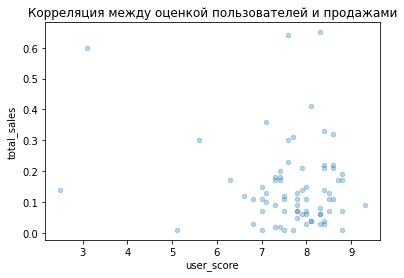

Коэффициент корреляции Пирсона продаж от оценок пользователей: -0.168


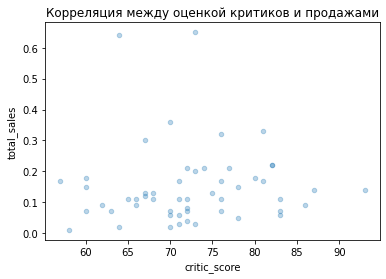

Коэффициент корреляции Пирсона продаж от оценок критиков: 0.041


In [279]:
for platform in data['platform'].unique():
    print('')
    print('')
    print('Проведем анализ зависимости между отзывами и продажами для платформы', platform)
    
    data\
    .loc[data['platform']==platform]\
    .plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.title('Корреляция между оценкой пользователей и продажами')
    plt.show()

    print('Коэффициент корреляции Пирсона продаж от оценок пользователей:',\
          round(data.loc[data['platform']==platform, 'user_score']\
                .corr(data.loc[data['platform']==platform, 'total_sales']), 3))

    
    data\
    .loc[data['platform']==platform]\
    .plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
    plt.title('Корреляция между оценкой критиков и продажами')
    plt.show()

    print('Коэффициент корреляции Пирсона продаж от оценок критиков:',\
          round(data.loc[data['platform']==platform, 'critic_score']\
                .corr(data.loc[data['platform']==platform, 'total_sales']), 3))

<div class="alert alert-block alert-info">
с помощью цикла проверяю зависимости от оценок у всех остальных платформ

ни у одной из платформ свзяь не прослеживается, из чего делаю вывод, что никакие оценки не влияют на продажи игр
</div>

In [280]:
data_genres=data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
data_genres

genre
Action          166.46
Shooter         144.93
Role-Playing     92.05
Sports           77.89
Misc             26.08
Racing           24.88
Fighting         24.67
Platform         16.92
Adventure        12.88
Simulation       12.12
Strategy          3.90
Puzzle            2.05
Name: total_sales, dtype: float64

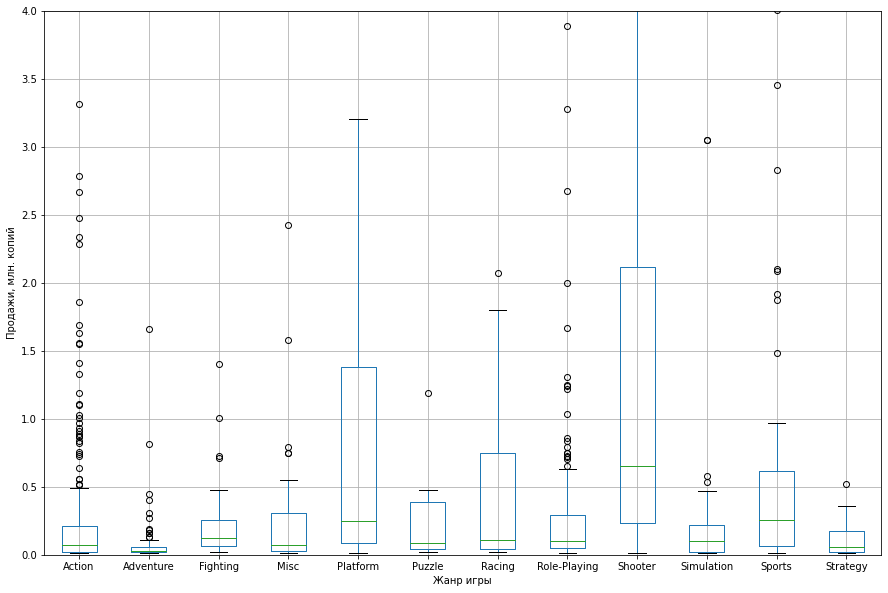

In [281]:
plt.figure(figsize =(15, 10))
plt.ylim(0, 4)

data.pivot_table(index='name', values='total_sales', columns='genre').boxplot()
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Жанр игры')
plt.show()

<div class="alert alert-block alert-info">
строю график распредения прибыли в зависимости от жанра  
</div>

In [282]:
data_genres=data.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)
data_genres

,total_sales
genre,
Shooter,0.570
Sports,0.210
Platform,0.150
Fighting,0.125
Misc,0.110
Role-Playing,0.110
Simulation,0.105
Action,0.090
Racing,0.090


<div class="alert alert-block alert-info">
видно, что такие жанры: Shooter и Sport выделяются как, наиболее успешные, тогда как Puzzle, Strategy и Adventure можно назвать 'мертвыми' жанрами с точки зрения получения прибыли
</div>

<a class="anchor" id="4"></a>
## Портрет пользователя каждого региона

Text(0.5, 1.0, 'Распределение платформ на ЕВРОПЕЙСКОМ рынке')

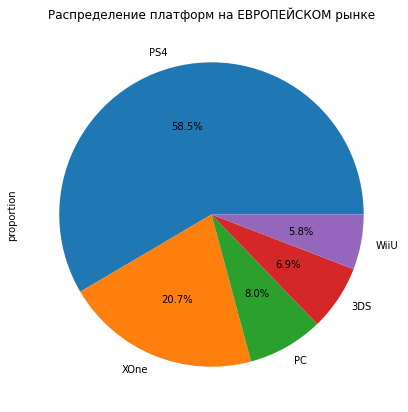

In [283]:
data_plat=data.pivot_table(index='platform',values=['eu_sales','total_sales'],aggfunc={'eu_sales':'sum'})\
.sort_values(by='eu_sales',ascending=False)
data_plat=data_plat.head(5)
data_plat['proportion']=data_plat['eu_sales']/data_plat['eu_sales'].sum()
data_plat['proportion'].plot(kind='pie',figsize=(7,7), autopct='%1.1f%%')
plt.title("Распределение платформ на ЕВРОПЕЙСКОМ рынке")

<div class="alert alert-block alert-info">
На графике видно чт оплатформа PS4 является основной в европейском регионе, ее прямой конкурент XOne еще не успел полноценно интегрироваться на европейский рынок.

все остальные платформы занимают менее 25% рынка суммарно и можно скзаать, что на них не стоит делать упор в европейском регионе
</div>

Text(0.5, 1.0, 'Распределение платформ на ЯПОНСКОМ рынке')

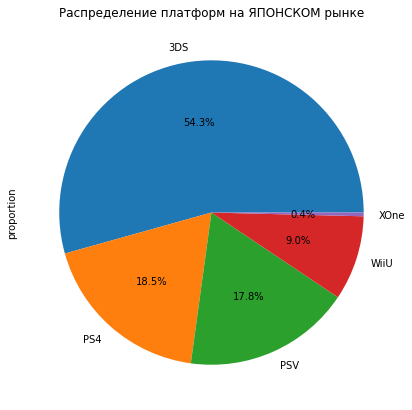

In [284]:
data_plat=data.pivot_table(index='platform',values=['jp_sales','total_sales'],aggfunc={'jp_sales':'sum'})\
.sort_values(by='jp_sales',ascending=False)
data_plat=data_plat.head(5)
data_plat['proportion']=data_plat['jp_sales']/data_plat['jp_sales'].sum()
data_plat['proportion'].plot(kind='pie',figsize=(7,7), autopct='%1.1f%%')
plt.title("Распределение платформ на ЯПОНСКОМ рынке")

<div class="alert alert-block alert-info">
Покупатели японии активно поддерживают игровые приставки собственного производства.

Особенно выделяется приставка 3DS на которую выходили культовые для японкой культуры игры и продолжает выходить множество игр каждый год, не смотря на то, ее можно считать морально устаревшеей.
    
Если у магазина продажи игр есть намерение охватить японский рынок, то продажа игр на 3DS является перспективным направлением
<br>    
<br>    
<br>    
<br>        
(я посмотрел на данные за 2022 год, и там лидером по продажам с большим отрывом является nintendo switch которая как раз пришла на замену 3DS, так что в расчетах нет ошибки и рынок японии действительно очень отличается от остального мира) 
</div>

Text(0.5, 1.0, 'Распределение платформ на АМЕРИКАНСКОМ рынке')

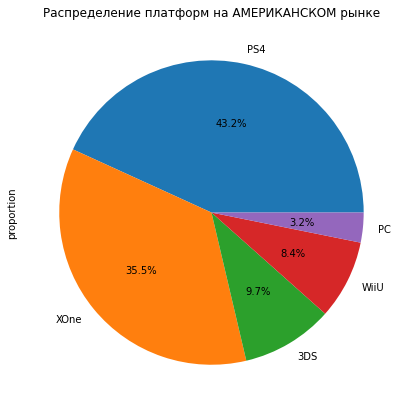

In [285]:
data_plat=data.pivot_table(index='platform',values=['na_sales','total_sales'],aggfunc={'na_sales':'sum'})\
.sort_values(by='na_sales',ascending=False,)
data_plat=data_plat.head(5)
data_plat['proportion']=data_plat['na_sales']/data_plat['na_sales'].sum()
data_plat['proportion'].plot(kind='pie',figsize=(7,7), autopct='%1.1f%%',normalize=False)
plt.title("Распределение платформ на АМЕРИКАНСКОМ рынке")

<div class="alert alert-block alert-info">
американский рынок очень похож на европейский
    
сдесь также две ключевые консоли PS4 и Xone занимают более 75% рынка, лишь с той разницей, что здесь XOne начал активнее развиваться и успел почти сравняться с прямым конкурентом
</div>

Text(0.5, 1.0, 'Распределение жанров игр на ЕВРОПЕЙСКОМ рынке')

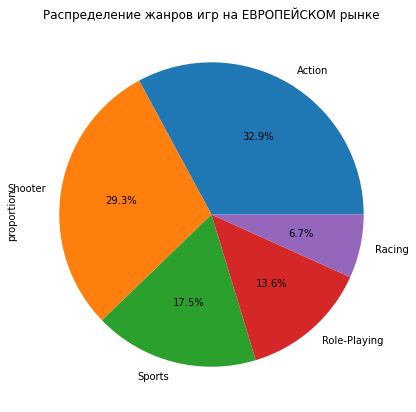

In [286]:
data_genre=data.pivot_table(index='genre',values=['eu_sales','total_sales'],aggfunc={'eu_sales':'sum'})\
.sort_values(by='eu_sales',ascending=False)
data_genre=data_genre.head(5)
data_genre['proportion']=data_genre['eu_sales']/data_genre['eu_sales'].sum()
data_genre['proportion'].plot(kind='pie',figsize=(7,7), autopct='%1.1f%%',normalize=False)
plt.title("Распределение жанров игр на ЕВРОПЕЙСКОМ рынке")

<div class="alert alert-block alert-info">
в европейском регионе самыми популярными являются Action и Shooter игры, они занимают более 60% рынка    
</div>

Text(0.5, 1.0, 'Распределение жанров игр на ЯПОНСКОМ рынке')

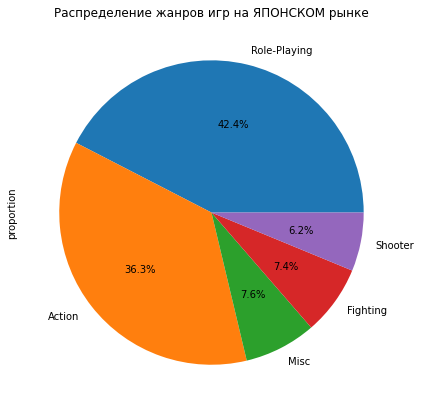

In [287]:
data_genre=data.pivot_table(index='genre',values=['jp_sales','total_sales'],aggfunc={'jp_sales':'sum'})\
.sort_values(by='jp_sales',ascending=False)
data_genre=data_genre.head(5)
data_genre['proportion']=data_genre['jp_sales']/data_genre['jp_sales'].sum()
data_genre['proportion'].plot(kind='pie',figsize=(7,7), autopct='%1.1f%%',normalize=False)
plt.title("Распределение жанров игр на ЯПОНСКОМ рынке")

<div class="alert alert-block alert-info">
распределения популярнсти игр в японии так же очень сильно отличается от остального мира в виду их уникальной культуры
    
если у компании есть задача охватить японский рынок, то следует обратить внимание на Role-Playing игры, которые являются основным продуктом в японии 
</div>

Text(0.5, 1.0, 'Распределение жанров игр на АМЕРИКАНСКОМ рынке')

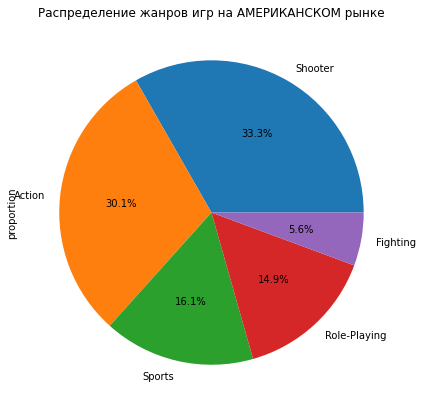

In [288]:
data_genre=data.pivot_table(index='genre',values=['na_sales','total_sales'],aggfunc={'na_sales':'sum'})\
.sort_values(by='na_sales',ascending=False)
data_genre=data_genre.head(5)
data_genre['proportion']=data_genre['na_sales']/data_genre['na_sales'].sum()
data_genre['proportion'].plot(kind='pie',figsize=(7,7), autopct='%1.1f%%',normalize=False)
plt.title("Распределение жанров игр на АМЕРИКАНСКОМ рынке")

<div class="alert alert-block alert-info">
популярность основных игр в америке очень схожа с европпой, отличие лишь в 5-6% рынка которые предпочитают Fighting вмесо Racing     
</div>

In [289]:
data_rating = data.pivot_table\
        (index='rating', \
        values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales'],\
        aggfunc='sum')
data_rating['eu_prop']=data_rating['eu_sales']/data_rating['eu_sales'].sum()
data_rating['jp_prop']=data_rating['jp_sales']/data_rating['jp_sales'].sum()
data_rating['na_prop']=data_rating['na_sales']/data_rating['na_sales'].sum()

In [290]:
data_rating

,eu_sales,jp_sales,na_sales,total_sales,eu_prop,jp_prop,na_prop
rating,,,,,,,
E,45.62,8.29,37.33,102.83,0.260418,0.269331,0.213558
E10+,17.16,4.22,22.93,49.71,0.097956,0.137102,0.131178
M,82.38,6.40,82.19,195.93,0.470259,0.207927,0.470195
T,30.02,11.87,32.35,83.94,0.171367,0.385640,0.185069


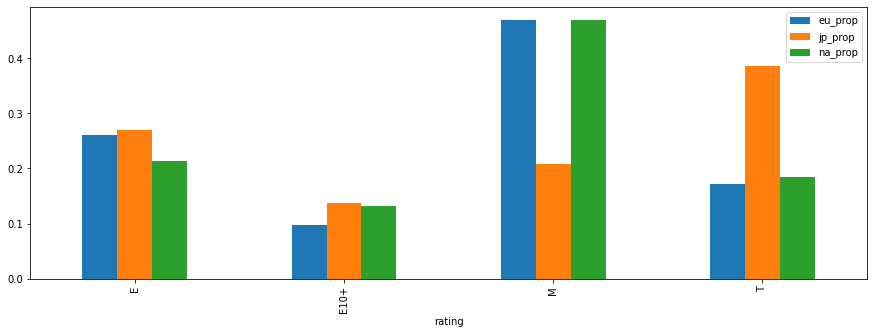

In [291]:
data_rating.plot(kind='bar', y=['eu_prop', 'jp_prop', 'na_prop'], figsize=(15,5))
plt.show()

<div class="alert alert-block alert-info">
строю графики популярности игр по возрастному рейтингу
    
рынки европпы и америки практически одинаковы, в отличии от японского, где наиболее хорошо продаваемые в остальных регионах игры с рейтингом M (17+, присутствует насилие и ненормативная лексика) пользуются значительно меньшей популярностью  
    
тогда как игры с рейтингом Т (13+ для подростков) имеют спрос в два раза выше остальных регионов
</div>

<a class="anchor" id="5"></a>
## Проверка гипотез

In [292]:
user_score_xbo = data.loc[data['platform'] == 'XOne', 'user_score'].dropna()
user_score_pc = data.loc[data['platform'] == 'PC', 'user_score'].dropna()

<div class="alert alert-block alert-info">
Проверяю гипотезу, что средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые

Сформулируем нулевую гипотезу, о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки будем использовать данные из двух генеральных совокупностей. Массив данных по каждой из платформ. Для оценки будем использовать критерий двустороннее значение p-value - вероятность совпадения рейтингов.

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые   
</div>

In [293]:
results = st.ttest_ind(user_score_xbo, user_score_pc, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-block alert-info">
Нулевая гипотеза не отвергнута, из чего можно сделать вывод, что пользовательские рейтинги для XOne и PC примерно одинаковые  
</div>

In [294]:
user_score_action = data.loc[data['genre'] == 'Action', 'user_score'].dropna()
user_score_sports = data.loc[data['genre'] == 'Sports', 'user_score'].dropna()

<div class="alert alert-block alert-info">
Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую гипотезу, о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Эта гипотеза является двусторонней. Соответственно альтернативная гипотеза обратна ей. Для проверки будем использовать данные из двух генеральных совокупностей. Массив данных по каждому из жанров. Для оценки будем использовать критерий двустороннее значение p-value - вероятность совпадения рейтингов. Нюанс в том, что при альтернативной гипотезе pvalue должна быть больше alpha.

H0: средние пользовательские рейтинги жанров Action и Sports одинаковые

H1: средние пользовательские рейтинги жанров Action и Sports разные 
</div>

In [295]:
results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1664151897936176e-08
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-info">
Нулевая гипотеза отвергнута, из чего можно сделать вывод, что пользовательские оценки для Action и Sport одинаковые  
</div>

<a class="anchor" id="6"></a>
## Общий вывод


На основании полученных данных был проведен анализ:
* Популярнсти платформ
* Популярности жанров игр
* Популярность игры в зависимости от возрастного рейтинга
* Зависимости успешности игры от рейтингов пользователей и критиков

При планировании расходов на рекламу игр на 2017 год следует учесть следующие факторы:

**Для европейского рынка**
* В качестве игровых платформ отдать предпочтение - PS4 (58% рынка) и XBox One (21% рынка)
* Среди жанров отдать предпочтение Action, Shooter, Sport (суммарно 80% рынка), RPG и Racing входят в топ 5, но имеют заничительно меньшую популярность
* Предпочитаемый возрастной рейтинг M (17+)

**Для американского рынка**
* В качестве игровых платформ отдать предпочтение - PS4 (43% рынка) и XBox One (36% рынка)
* Среди жанров отдать предпочтение Action, Shooter, Sport (суммарно 79% рынка), RPG и Fighting входят в топ 5, но имеют заничительно меньшую популярность
* Предпочитаемый возрастной рейтинг M (17+)
<br>
<br>
Европейский и американский рынок очень похожи и основные рекламные кампании можно проводить одинаковые 
<br>
<br>  

**Для японкого рынка**
* В качестве платформы рассматривать ТОЛЬКО японских производителей (99% рынка) и в особенности 3DS (54% рынка)
* Среди жанров отдать предпочтение Action, Role-Playing (суммарно 79% рынка). Misc, Fighting и Shooter входят в топ 5, но имеют заничительно меньшую популярность
* Игры с возрастным рейтингом M продаются значительно хуже, чем в остальном мире, при этом игры с рейтингом Т гораздо лучше чем в остальном мире
<br>
<br>
<br>
На мой взгляд стоит отдать предпочтение европейскому и американскому рынку, так как можно уменьшить расходы проводя схожие рекламные кампании при этом охватив большую часть общего рынка по продаже игр.
<br>
На японский рынок следует обратить внимание,когда выйдет новая японская классическая консоль на замену 3DS, которая постепенно начинает устаревать.С ее выходом произойдет резкое увеличение продаж игр в японии. Предположу, что это случится через 2-3 года 